In [15]:
import cv2
import skimage.data
import scipy as sp
import numpy as np
import matplotlib.pylab as plt

plt.rc('font', family='NanumMyeongjo') # For Windows
print(plt.rcParams['font.family'])

['NanumMyeongjo']


In [5]:
img_astro = skimage.data.astronaut()
img = cv2.cvtColor(img_astro, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape[:2]

#이미지의 중심점을 기준으로 90도 회전. 크기는 70%
H = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.7)

# 50만큼 평행이동
H[:, 2] += 50
H

array([[  0.60621778,   0.35      ,  61.20824764],
       [ -0.35      ,   0.60621778, 240.40824764]])

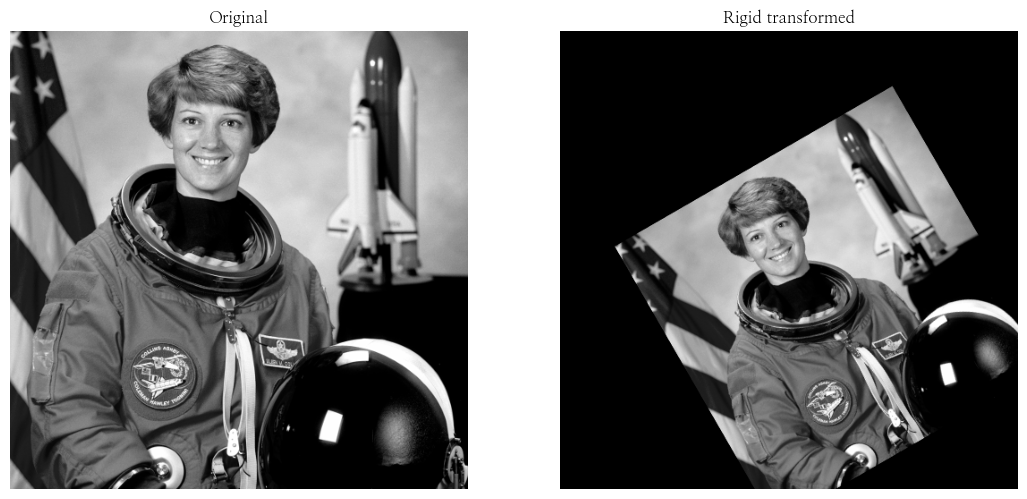

In [8]:
dst = cv2.warpAffine(img, H, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 13))
ax1.set_title("Original")
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)

ax2.set_title("Rigid transformed")
ax2.axis("off")
ax2.imshow(dst, cmap=plt.cm.gray)
plt.show()

3점 어파인 변환

어파인 변환에 사용되는 행렬을 지정하는데는 3점이 어떻게 변환되는지만 알면 된다. 

OpenCV에는 주어진 두 쌍의 3점으로부터 어파인 변환을 위한 사영행렬을 계산하는 getAffineMatrix 함수를 제공한다.

In [17]:
img = sp.misc.face()
rows, cols, ch = img.shape

pts1 = np.float32([[200, 200], [200, 600], [800, 200]])
pts2 = np.float32([[100, 100], [200, 500], [600, 100]])

pts_x1, pts_y1 = zip(*pts1)
pts_x2, pts_y2 = zip(*pts2)

H_affine = cv2.getAffineTransform(pts1, pts2)
H_affine

C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_20024\4132951937.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = sp.misc.face()


array([[ 8.33333333e-01,  2.50000000e-01, -1.16666667e+02],
       [-1.77635684e-17,  1.00000000e+00, -1.00000000e+02]])

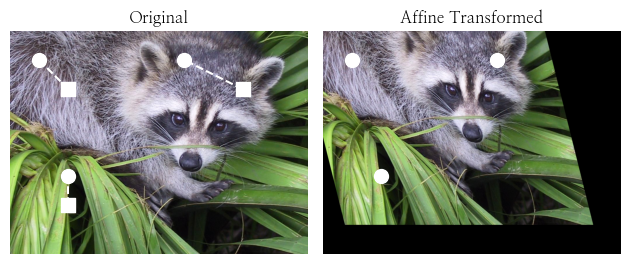

In [22]:
img2 = cv2.warpAffine(img, H_affine, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2)  # plt.subplot() -> plt.subplots()

ax1.set_title("Original")
ax1.imshow(img)
ax1.scatter(pts_x1, pts_y1, c="w", s=100, marker="s")
ax1.scatter(pts_x2, pts_y2, c="w", s=100)
ax1.plot(list(zip(*np.stack((pts_x1, pts_x2), axis=-1))),
         list(zip(*np.stack((pts_y1, pts_y2), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Affine Transformed")
ax2.imshow(img2)
ax2.scatter(pts_x2, pts_y2, c='w', s=100) 
ax2.axis("off")

plt.tight_layout()
plt.show()
    

원근변환

원근변환(perspective transform)은 핀홀 카메라(pin-hole camera) 모형을 사용하여 2차원 이미지를 변환하는 방법이다. 원근법 변환은 직선의 성질만 유지가 되고, 선의 평행성은 유지가 되지 않는 변환이다.


그림 2.4.1 : 핀홀카메라 모형

원근변환을 지정하는데는 4점이 필요하다. OpenCV에는 주어진 두 쌍의 4점으로부터 원근변환을 위한 사영행렬을 계산하는 getPerspectiveTransform 함수를 제공한다. 실제 변환에는 warpPerspective 함수를 사용한다.

In [25]:
pts1 = np.float32([[200, 200], [200, 600], [800, 200], [800, 600]])
pts2 = np.float32([[300, 300], [300, 500], [600, 100], [700, 500]])

H_perspective = cv2.getPerspectiveTransform(pts1, pts2)
H_perspective

array([[-8.43769499e-17, -7.62711864e-02,  2.59322034e+02],
       [-3.38983051e-01,  2.79661017e-01,  2.55932203e+02],
       [-6.77966102e-04, -2.54237288e-04,  1.00000000e+00]])

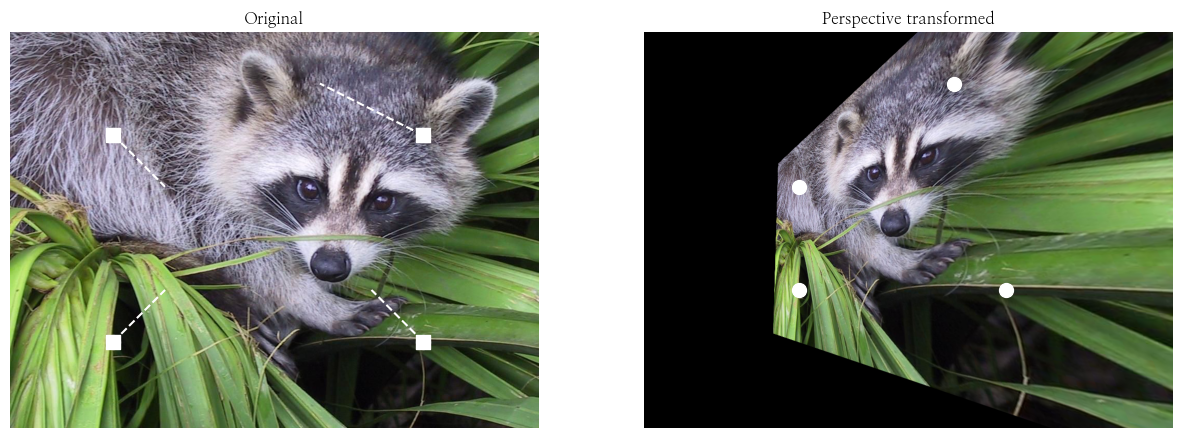

In [29]:
img2 = cv2.warpPerspective(img, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x, pts_y, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")

ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()